# Data Science Capstone Project: Chinook Database Analysis

This project explores and analyzes the Chinook database, a sample digital media store database, using Python. The project is divided into two parts:

1. **Part One**: Analyze data from the Chinook database to derive insights.
2. **Part Two**: Build a machine learning model to predict Customer Lifetime Value (CLV).

The objective is to gain insights, create visualizations, and develop actionable recommendations.

The Chinook database serves as a robust foundation for exploring diverse data analysis techniques and visualizations, particularly in a digital media store. Structured to simulate real-world operations, the database includes customer information, invoices, tracks, genres, and artists. These features provide a rich dataset for investigating business operations, customer behavior, and sales trends.

This project aims to analyze the Chinook database, leveraging tools such as Python and Power BI to extract insights and present findings effectively. The primary objectives include exploring the database structure, performing targeted analyses, and generating meaningful visualizations to support data-driven decisions.

Key analyses for the Chinook database include identifying top-selling artists, understanding customer purchase patterns, assessing genre popularity, analyzing sales trends, and calculating Customer Lifetime Value (CLV). These use cases will highlight potential growth opportunities, optimize customer engagement strategies, and provide actionable recommendations for a digital media store's operations.

<h2><b>Part One: Analyze data from the Chinook database to derive insights</b></h2>



In [1]:
# load and activate sql extention
%load_ext sql

In [2]:
#Load the database
%sql sqlite:///chinook.db

'Connected: @chinook.db'

In [3]:
#list all the tables in the database
%sql SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///chinook.db
Done.


name
albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

 * sqlite:///chinook.db
Done.
(sqlite3.OperationalError) near "Plot": syntax error
[SQL: Plot the yearly sales trend
plt.figure(figsize=(10, 6))
plt.plot(yearlySales_df['Year'], yearlySales_df['YearlySales'], marker='o', color='b', linestyle='-', linewidth=2)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Yearly Sales')
plt.title('Yearly Sales Trend')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()                                            %%sql
-- Monthly sales trends
SELECT 
    strftime('%Y-%m', InvoiceDate) AS Month, 
    SUM(Total) AS MonthlySales
FROM 
    Invoices
GROUP BY 
    strftime('%Y-%m', InvoiceDate)
ORDER BY 
    Month;]
(Background on this error at: http://sqlalche.me/e/14/e3q8)


# Use case 1. Top-Selling Artists
Objective: Identify artists with the highest sales and analyze their sales trends over time.

In [4]:
%%sql
SELECT ar.Name AS Artist, Round(SUM(ii.Quantity * ii.UnitPrice), 2) AS Total_Sales
FROM artists ar
JOIN albums al
ON ar.ArtistId = al.artistId
JOIN tracks tr
ON al.AlbumId = tr.AlbumId
JOIN invoice_items ii
ON ii.TrackId = tr.TrackId
GROUP BY ar.Name
ORDER BY Total_Sales DESC
LIMIT 10;


 * sqlite:///chinook.db
Done.


Artist,Total_Sales
Iron Maiden,138.6
U2,105.93
Metallica,90.09
Led Zeppelin,86.13
Lost,81.59
The Office,49.75
Os Paralamas Do Sucesso,44.55
Deep Purple,43.56
Faith No More,41.58
Eric Clapton,39.6


In [11]:
Data = _

In [12]:
Data_df = Data.DataFrame()

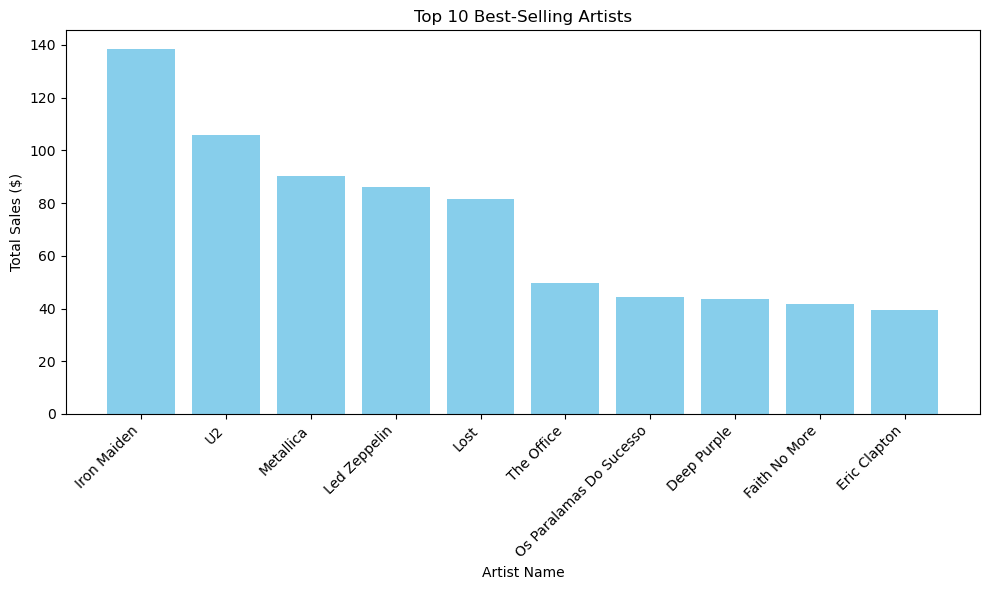

In [13]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.bar(Data_df['Artist'], Data_df['Total_Sales'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artist Name')
plt.ylabel('Total Sales ($)')
plt.title('Top 10 Best-Selling Artists')
plt.tight_layout()
plt.show()

In [ ]:
##1b. Sales trend over time on the top ten (10) highest-sel
In this project, the sales period will be grouped by month_ year to give an insight into they changes over time.

In [39]:
%%sql
WITH Top_Artists AS (
    -- Step 1: Get the top 10 artists based on total sales
    SELECT ar.ArtistId, ar.Name AS Artist, 
           ROUND(SUM(ii.Quantity * ii.UnitPrice), 2) AS Total_Sales
    FROM artists ar
    JOIN albums al ON ar.ArtistId = al.ArtistId
    JOIN tracks tr ON al.AlbumId = tr.AlbumId
    JOIN invoice_items ii ON ii.TrackId = tr.TrackId
    JOIN invoices i ON i.InvoiceId = ii.InvoiceId
    GROUP BY ar.ArtistId
    ORDER BY Total_Sales DESC
    LIMIT 10
)
-- Step 2: Get sales trends for these top 10 artists by month
SELECT ar.Name AS Artist, 
       ROUND(SUM(ii.Quantity * ii.UnitPrice), 2) AS Total_Sales, 
       strftime('%Y-%m', i.InvoiceDate) AS Month
FROM artists ar
JOIN albums al ON ar.ArtistId = al.ArtistId
JOIN tracks tr ON al.AlbumId = tr.AlbumId
JOIN invoice_items ii ON ii.TrackId = tr.TrackId
JOIN invoices i ON i.InvoiceId = ii.InvoiceId
JOIN Top_Artists ta ON ar.ArtistId = ta.ArtistId
GROUP BY strftime('%Y-%m', i.InvoiceDate), ar.Name
ORDER BY ta.Total_Sales DESC, Month

 * sqlite:///chinook.db
Done.


Artist,Total_Sales,Month
Iron Maiden,23.76,2009-06
Iron Maiden,9.9,2009-07
Iron Maiden,18.81,2010-09
Iron Maiden,15.84,2010-10
Iron Maiden,0.99,2011-12
Iron Maiden,33.66,2012-01
Iron Maiden,12.87,2013-04
Iron Maiden,22.77,2013-05
U2,9.9,2010-01
U2,9.9,2010-02


In [40]:
trends = _

In [41]:
trends_df= trends.DataFrame()

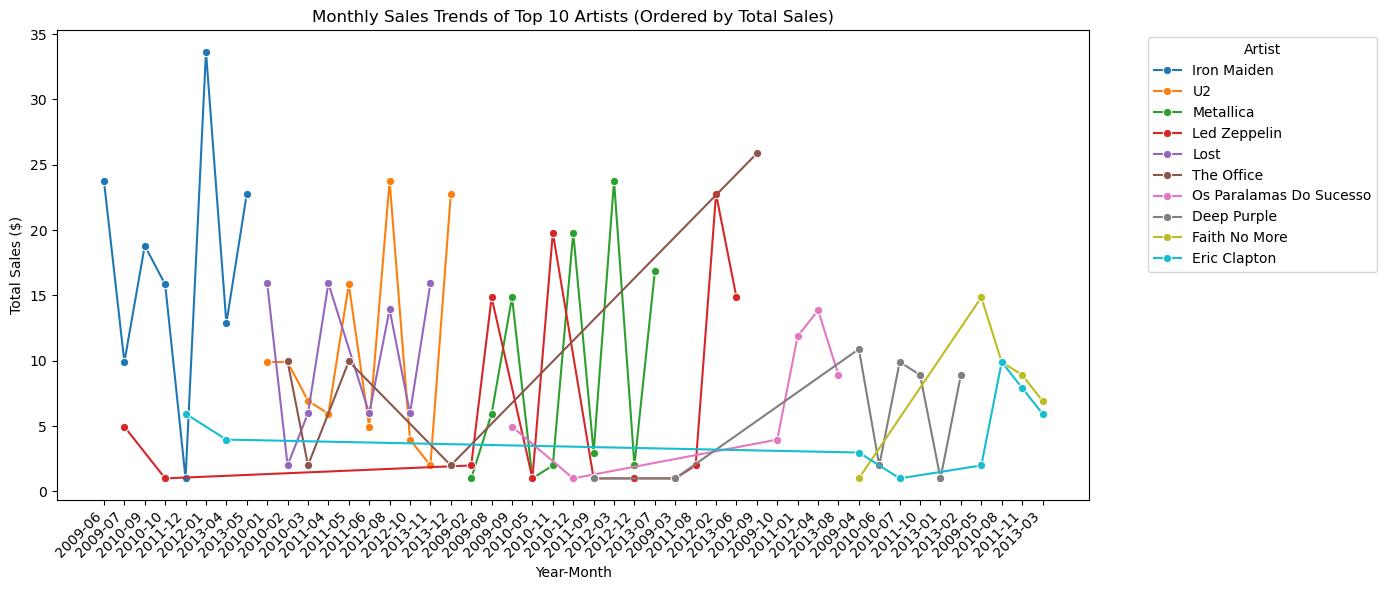

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=trends_df, x='Month', y='Total_Sales', hue='Artist', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales ($)')
plt.title('Monthly Sales Trends of Top 10 Artists (Ordered by Total Sales)')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
#Data_df.to_csv('top_artist.csv',index = False)

In [18]:
#trends_df.to_csv('sales_trend.csv', index = False)

Insights from case 1:
The data reveals signi ant  variability in sales performance across artists. While some (e.g., U2) show consistent sales, most are highly inconsisten.
Key Takeaways from this are:
1. Iron Maiden is consistently the highest-selling artist overall.

2. U2, Metallica, and Led Zeppelin also show strong sales but with variations over time.

3. Sales trends indicate some artists have short bursts of high sales, while others maintain consistent growth.

in all, this data could help in predicting future sales and identifying artists with strong long-term appeal versus those with sporadic popularity spikes..

<h2><b>Case 2 :Segment customers based on purchase behavior and identify key characteristics of high-value customers.</b></h2>



In [43]:
%%sql
WITH LatestDate AS (
    SELECT MAX(InvoiceDate) AS MaxDate
    FROM invoices
),
CustomerMetrics AS (
    SELECT
        c.CustomerId,
        c.FirstName || ' ' || c.LastName AS CustomerName,
        COUNT(DISTINCT i.InvoiceId) AS PurchaseFrequency,
        MAX(i.InvoiceDate) AS LastPurchaseDate,
        SUM(i.Total) AS TotalSpent,
        ROUND(JULIANDAY((SELECT MaxDate FROM LatestDate)) - JULIANDAY(MAX(i.InvoiceDate)), 0) AS Recency
    FROM Customers c
    INNER JOIN Invoices i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId, c.FirstName, c.LastName
),
RFM_Scores AS (
    SELECT
        CustomerId,
        CustomerName,
        PurchaseFrequency,
        Recency,
        TotalSpent,
        NTILE(5) OVER (ORDER BY Recency DESC) AS RecencyScore,
        NTILE(5) OVER (ORDER BY PurchaseFrequency DESC) AS FrequencyScore,
        NTILE(5) OVER (ORDER BY TotalSpent ASC) AS MonetaryScore
    FROM CustomerMetrics
)
SELECT
    CustomerId,
    CustomerName,
    PurchaseFrequency,
    Recency,
    TotalSpent,
    RecencyScore,
    FrequencyScore,
    MonetaryScore,
    (RecencyScore + FrequencyScore + MonetaryScore) AS TotalScore,
    CASE
        WHEN (RecencyScore + FrequencyScore + MonetaryScore) BETWEEN 13 AND 15 THEN 'High-Value'
        WHEN (RecencyScore + FrequencyScore + MonetaryScore) BETWEEN 9 AND 12 THEN 'Medium-Value'
        ELSE 'Low-Value'
    END AS CustomerSegment
FROM RFM_Scores
ORDER BY TotalScore DESC;


 * sqlite:///chinook.db
Done.


CustomerId,CustomerName,PurchaseFrequency,Recency,TotalSpent,RecencyScore,FrequencyScore,MonetaryScore,TotalScore,CustomerSegment
6,Helena Holý,7,39.0,49.62,5,5,5,15,High-Value
25,Victor Stevens,7,17.0,42.62,5,5,5,15,High-Value
46,Hugh O'Reilly,7,48.0,45.62,4,5,5,14,High-Value
44,Terhi Hämäläinen,7,8.0,41.62,5,4,5,14,High-Value
37,Fynn Zimmermann,7,202.0,43.62,3,5,5,13,High-Value
7,Astrid Gruber,7,186.0,42.62,3,5,5,13,High-Value
45,Ladislav Kovács,7,155.0,45.62,3,5,5,13,High-Value
24,Frank Ralston,7,124.0,43.62,3,5,5,13,High-Value
20,Dan Miller,7,31.0,39.62,5,4,4,13,High-Value
26,Richard Cunningham,7,261.0,47.62,2,5,5,12,Medium-Value


In [44]:
segment = _

In [45]:
# Convert the result into a Pandas DataFrame
segment_df = segment.DataFrame

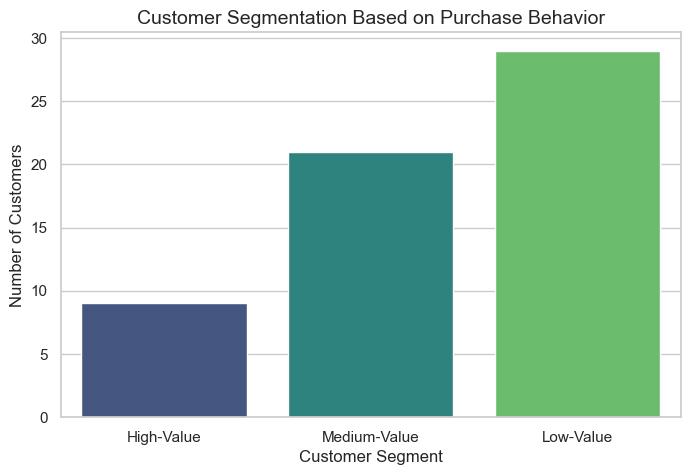

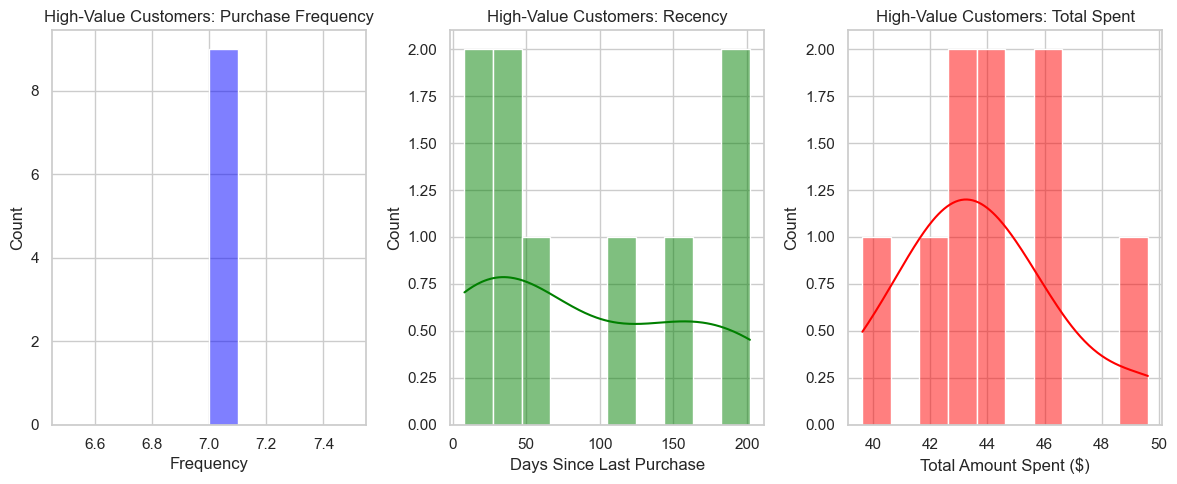

In [46]:
#visualization of the use case 1
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#  Connect to SQLite Database
conn = sqlite3.connect('chinook.db')

# Define SQL Query for RFM Analysis & Segmentation
query = """
WITH LatestDate AS (
    SELECT MAX(InvoiceDate) AS MaxDate
    FROM invoices
),
CustomerMetrics AS (
    SELECT
        c.CustomerId,
        c.FirstName || ' ' || c.LastName AS CustomerName,
        COUNT(DISTINCT i.InvoiceId) AS PurchaseFrequency,
        MAX(i.InvoiceDate) AS LastPurchaseDate,
        SUM(i.Total) AS TotalSpent,
        ROUND(JULIANDAY((SELECT MaxDate FROM LatestDate)) - JULIANDAY(MAX(i.InvoiceDate)), 0) AS Recency
    FROM Customers c
    INNER JOIN Invoices i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId, c.FirstName, c.LastName
),
RFM_Scores AS (
    SELECT
        CustomerId,
        CustomerName,
        PurchaseFrequency,
        Recency,
        TotalSpent,
        NTILE(5) OVER (ORDER BY Recency DESC) AS RecencyScore,
        NTILE(5) OVER (ORDER BY PurchaseFrequency DESC) AS FrequencyScore,
        NTILE(5) OVER (ORDER BY TotalSpent ASC) AS MonetaryScore
    FROM CustomerMetrics
)
SELECT
    CustomerId,
    CustomerName,
    PurchaseFrequency,
    Recency,
    TotalSpent,
    RecencyScore,
    FrequencyScore,
    MonetaryScore,
    (RecencyScore + FrequencyScore + MonetaryScore) AS TotalScore,
    CASE
        WHEN (RecencyScore + FrequencyScore + MonetaryScore) BETWEEN 13 AND 15 THEN 'High-Value'
        WHEN (RecencyScore + FrequencyScore + MonetaryScore) BETWEEN 9 AND 12 THEN 'Medium-Value'
        ELSE 'Low-Value'
    END AS CustomerSegment
FROM RFM_Scores
ORDER BY TotalScore DESC;
"""

# Load Data into Pandas DataFrame
df = pd.read_sql_query(query, conn)

#  Close Database Connection
conn.close()

# Visualizing Customer Segments
sns.set(style="whitegrid")

# Count Plot of Customer Segments
plt.figure(figsize=(8, 5))
sns.countplot(x="CustomerSegment", data=df, hue="CustomerSegment", palette="viridis", legend=False, order=["High-Value", "Medium-Value", "Low-Value"])
plt.title("Customer Segmentation Based on Purchase Behavior", fontsize=14)
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

# Visualizing Key Characteristics of High-Value Customers
high_value = df[df["CustomerSegment"] == "High-Value"]

plt.figure(figsize=(12, 5))

# Purchase Frequency Distribution
plt.subplot(1, 3, 1)
sns.histplot(high_value["PurchaseFrequency"], bins=10, kde=True, color="blue")
plt.title("High-Value Customers: Purchase Frequency")
plt.xlabel("Frequency")

# Recency Distribution
plt.subplot(1, 3, 2)
sns.histplot(high_value["Recency"], bins=10, kde=True, color="green")
plt.title("High-Value Customers: Recency")
plt.xlabel("Days Since Last Purchase")

# Total Spent Distribution
plt.subplot(1, 3, 3)
sns.histplot(high_value["TotalSpent"], bins=10, kde=True, color="red")
plt.title("High-Value Customers: Total Spent")
plt.xlabel("Total Amount Spent ($)")

plt.tight_layout()
plt.show()



In [47]:
df.to_csv('customer_segmentss.csv', index=False)


In [48]:

high_value.to_csv("high_value_customerss.csv", index=False)


In [49]:

high_value[["CustomerId", "CustomerName", "PurchaseFrequency", "Recency", "TotalSpent"]].to_csv("high_value_characteristicss.csv", index=False)



The above query presents a segmentation of customers using RFM analysis (Recency, Frequency, and Monetary value) with scoring to classify them into High-Value, Medium-Value, and Low-Value segments.
NTILE(5) was used to ensure evenly distributed recency, frequency, and monetary scores.This method adapts well even if customer purchase patterns change.

*Key Characteristics of High-Value Customers*
Customers classified as "High-Value" (TotalScore: 13-15) have the following traits:

High Recency Score (3-5): This means they have made recent purchases, indicating continued engagement.
High Frequency Score (5): They have made multiple purchases, showing strong brand loyalty.
High Monetary Score (5): They have spent the most money compared to other customers.

*Observations:*
These customers have made at least 7 purchases (PurchaseFrequency = 7).
Their Recency is relatively low (around 4000 days), meaning they have been active in the recent past.
Their TotalSpent is consistently high, exceeding $40 in most cases.
Most High-Value customers have a RecencyScore of 5 or 4, meaning they have made recent purchases.
These customers tend to spend more on their transactions.

*Recommendation for High-Value Customers:*

1. Implement loyalty programs and personalized offers to retain them.
2. Offer exclusive discounts or early access to new products.
3. Provide personalized communication (emails, promotions) to maintain engagement.

<h2><b>Case 3: Determine the most popular music genres and analyze the change in genre 
popularity over different time periods</b></h2> 

In [50]:
%%sql
SELECT 
    g.Name AS Genre,
    COUNT(il.TrackId) AS TrackSold,  -- Total number of tracks sold per genre
    SUM(il.UnitPrice * il.Quantity) AS TotalSales  -- Total sales per genre
FROM 
    Invoices i
JOIN 
    Invoice_items il ON i.InvoiceId = il.InvoiceId
JOIN 
    tracks t ON il.TrackId = t.TrackId
JOIN 
    genres g ON t.GenreId = g.GenreId
GROUP BY 
    g.Name
ORDER BY 
    TotalSales DESC, TrackSold DESC
LIMIT 10;


 * sqlite:///chinook.db
Done.


Genre,TrackSold,TotalSales
Rock,835,826.65
Latin,386,382.14
Metal,264,261.36
Alternative & Punk,244,241.56
TV Shows,47,93.53
Jazz,80,79.2
Blues,61,60.39
Drama,29,57.71
Classical,41,40.589999999999996
R&B/Soul,41,40.589999999999996


In [51]:
genres_popularity1 = _

In [52]:
genres_popularity1_df = genres_popularity1.DataFrame()

In [53]:
print("Total Tracks Count:", genres_popularity1_df['TrackSold'].sum())



Total Tracks Count: 2028


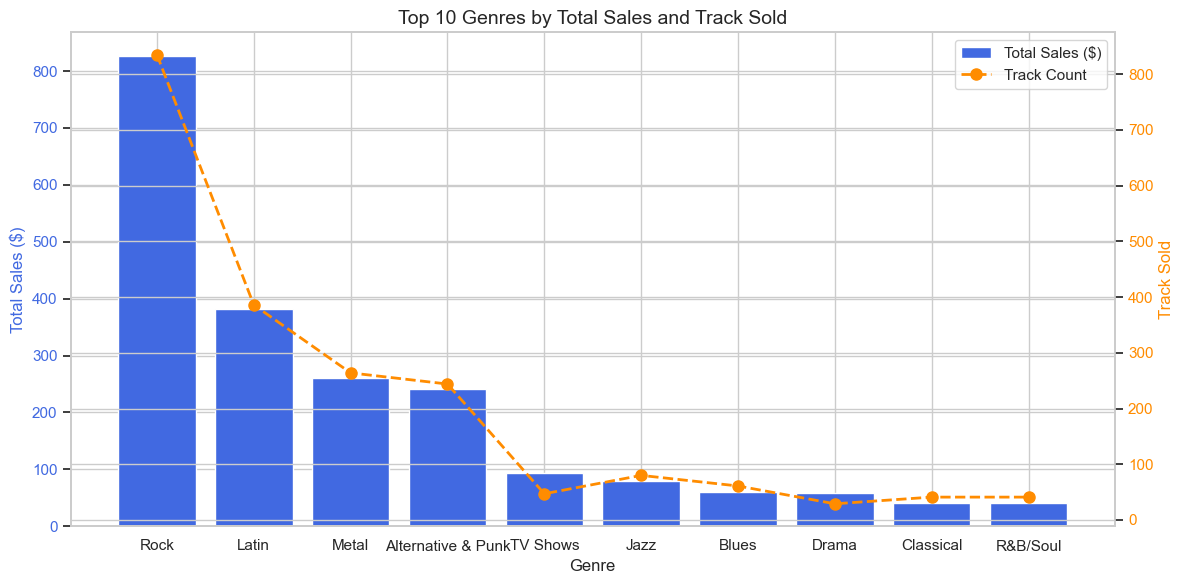

In [54]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Sales (bar chart)
ax1.bar(genres_popularity1_df["Genre"], genres_popularity1_df["TotalSales"], color='royalblue', label="Total Sales ($)")
ax1.set_xlabel("Genre", fontsize=12)
ax1.set_ylabel("Total Sales ($)", color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')

# Create second Y-axis for Track Count
ax2 = ax1.twinx()
ax2.plot(genres_popularity1_df["Genre"], genres_popularity1_df["TrackSold"], color='darkorange', marker='o', linestyle='dashed', linewidth=2, markersize=8, label="Track Count")
ax2.set_ylabel("Track Sold", color='darkorange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkorange')

# Add title and legend
plt.title("Top 10 Genres by Total Sales and Track Sold", fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [55]:
%%sql
SELECT 
    g.Name AS Genre,
    STRFTIME('%Y-%m', i.InvoiceDate) AS YearMonth,
    COUNT(t.TrackId) AS TracksSold
FROM 
    invoices i
    JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
    JOIN tracks t ON ii.TrackId = t.TrackId
    JOIN genres g ON t.GenreId = g.GenreId
GROUP BY 
    g.Name,
    STRFTIME('%Y-%m', i.InvoiceDate)
ORDER BY 
    TracksSold DESC;

 * sqlite:///chinook.db
Done.


Genre,YearMonth,TracksSold
Rock,2013-12,30
Rock,2012-02,28
Rock,2012-08,26
Latin,2010-05,25
Rock,2011-05,25
Metal,2012-03,24
Rock,2010-07,24
Rock,2010-11,24
Rock,2011-02,24
Latin,2012-12,23


In [56]:
genre_trendss = _
genre_trendss_df = genre_trendss.DataFrame()

In [57]:
# Total tracks sold per genre (ignoring time)
top_genres = genre_trendss_df.groupby('Genre')['TracksSold'].sum().nlargest(10).index

# Filter the original DataFrame for only these top 10 genres (with .copy() to avoid SettingWithCopyWarning)
top_genre_df = genre_trendss_df[genre_trendss_df['Genre'].isin(top_genres)].copy()

# Ensure YearMonth is datetime for plotting
top_genre_df['YearMonth'] = pd.to_datetime(top_genre_df['YearMonth'])



In [58]:
genre_trendd = _
genre_trendd_df = genre_trendd.DataFrame()

In [59]:
print("Unique Year-Months:", genre_trendss_df['YearMonth'].nunique())



Unique Year-Months: 60


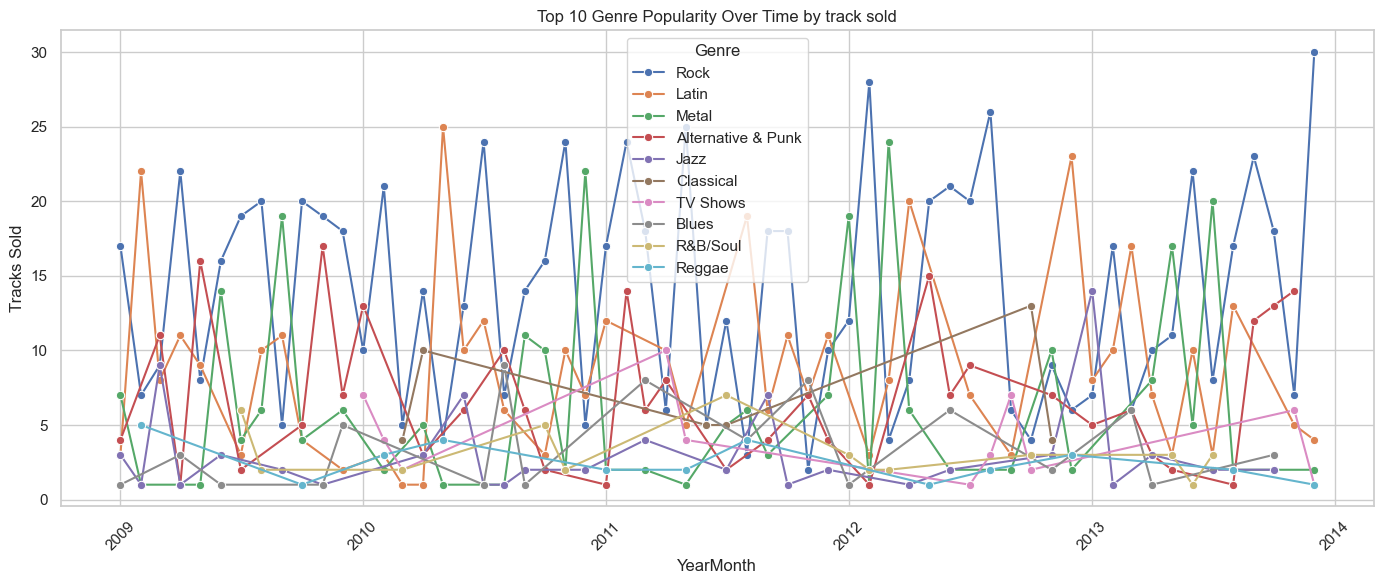

In [364]:

plt.figure(figsize=(14, 6))
sns.lineplot(data=top_genre_df, x='YearMonth', y='TracksSold', hue='Genre', marker='o')
plt.title("Top 10 Genre Popularity Over Time by track sold")
plt.xlabel("YearMonth")
plt.ylabel("Tracks Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the plot, Rock started as the most popular genre in January 2009 but saw a decline in February, indicating a decrease in track sales.Latin saw a sharp rise, overtaking all other genres by February with the highest number of tracks sold. Other genres like Metal, Alternative & Punk, and Reggae showed minimal activity, with little to no growth or even a decline.Genres like Jazz and Blues were either not sold in notable quantities or absent from the top-selling list during this time.
Overall, the plot suggests a shift in user preference from Rock to Latin music within this short time span.

In [437]:
# saving the genre trend for power BI dashboard
genre_trendss_df.to_csv('genre_trendss.csv',index = False)

In [440]:
genre_trendd_df.to_csv('genre_trendd.csv',index = False)

In [417]:
genres_popularity1_df.to_csv('genres_popularity1.csv',index = False)

<h2><b> Case 4:Sales Over Time: Analyze monthly and yearly sales trends, including seasonal effects and significant sales events.</b></h2>

Seasonal effects can be analyzed by looking at monthly or quarterly trends. For example, the following query shows the sales for each year and month, allowing one observe if there are specific months with higher sale.

*

<h2><B>**Yearly sales**</B></h2>

In [13]:

%%sql
SELECT 
    strftime('%Y', InvoiceDate) AS Year, 
    SUM(Total) AS YearlySales
FROM 
    Invoices
GROUP BY 
    strftime('%Y', InvoiceDate)
ORDER BY 
    Year ;



 * sqlite:///chinook.db
Done.


Year,YearlySales
2009,449.46
2010,481.45
2011,469.58
2012,477.53
2013,450.58


In [14]:
# Assign the result to
yearlySales = _

In [15]:
# Convert the result into a Pandas DataFrame for easier analysis
yearlySales_df = yearlySales.DataFrame()

C:\Users\THIS-PC\anaconda3\envs\Phython\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\THIS-PC\anaconda3\envs\Phython\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\THIS-PC\anaconda3\envs\Phython\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


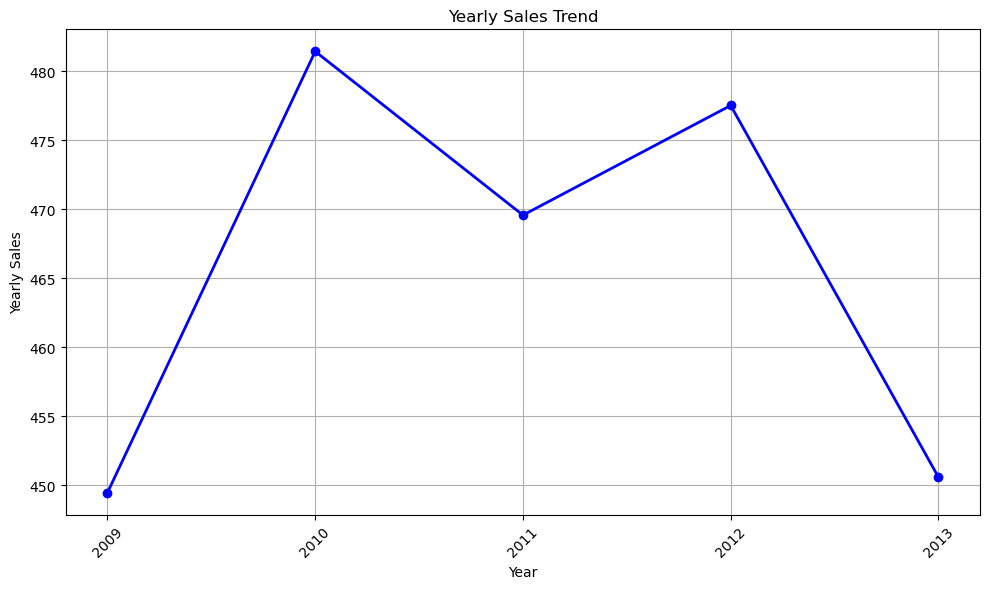

In [16]:

# Plot the yearly sales trend
plt.figure(figsize=(10, 6))
plt.plot(yearlySales_df['Year'], yearlySales_df['YearlySales'], marker='o', color='b', linestyle='-', linewidth=2)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Yearly Sales')
plt.title('Yearly Sales Trend')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
%%sql
SELECT 
    InvoiceDate, 
    Total 
FROM 
    Invoices;


 * sqlite:///chinook.db
Done.


InvoiceDate,Total
2009-01-01 00:00:00,1.98
2009-01-02 00:00:00,3.96
2009-01-03 00:00:00,5.94
2009-01-06 00:00:00,8.91
2009-01-11 00:00:00,13.86
2009-01-19 00:00:00,0.99
2009-02-01 00:00:00,1.98
2009-02-01 00:00:00,1.98
2009-02-02 00:00:00,3.96
2009-02-03 00:00:00,5.94


In [19]:
invoiceDate= _
invoiceDate_df= invoiceDate.DataFrame()

In [20]:
invoiceDate_df.to_csv('InvoiceDate_Total.csv', index=False)

In [22]:
**Monthly Sales**

SyntaxError: invalid syntax (2345260431.py, line 1)

In [23]:
%%sql
-- Monthly sales trends
SELECT 
    strftime('%Y-%m', InvoiceDate) AS YearMonth, 
    SUM(Total) AS MonthlySales
FROM 
    Invoices
GROUP BY 
    strftime('%Y-%m', InvoiceDate)
ORDER BY 
    YearMonth;

 * sqlite:///chinook.db
Done.


YearMonth,MonthlySales
2009-01,35.64
2009-02,37.62
2009-03,37.62
2009-04,37.62
2009-05,37.62
2009-06,37.62
2009-07,37.62
2009-08,37.62
2009-09,37.62
2009-10,37.62


In [24]:
monthly_sales = _

In [25]:
# Convert the result into a Pandas DataFrame
monthly_sales_df = monthly_sales.DataFrame()

In [28]:
monthly_sales_df['Year'] = pd.to_datetime(monthly_sales_df['YearMonth']).dt.year
monthly_sales_df['MonthNumber'] = pd.to_datetime(monthly_sales_df['YearMonth']).dt.month

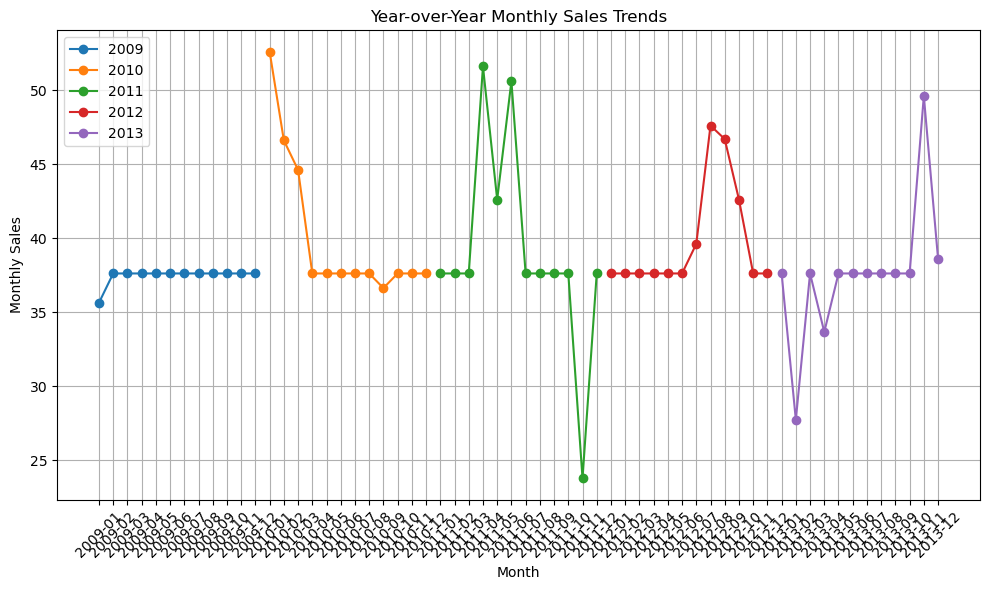

In [29]:
# Plot YoY comparison
plt.figure(figsize=(10, 6))
for year in monthly_sales_df['Year'].unique():
    yearly_data = monthly_sales_df[monthly_sales_df['Year'] == year]
    plt.plot(yearly_data['YearMonth'], yearly_data['MonthlySales'], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.title('Year-over-Year Monthly Sales Trends')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()  

In [31]:
# Convert 'Month' column to datetime format
monthly_sales_df['YearMonth'] = pd.to_datetime(monthly_sales_df['YearMonth'])
monthly_sales_df['Year'] = monthly_sales_df['YearMonth'].dt.year
monthly_sales_df['MonthNumber'] = monthly_sales_df['YearMonth'].dt.month


<Figure size 1000x600 with 0 Axes>

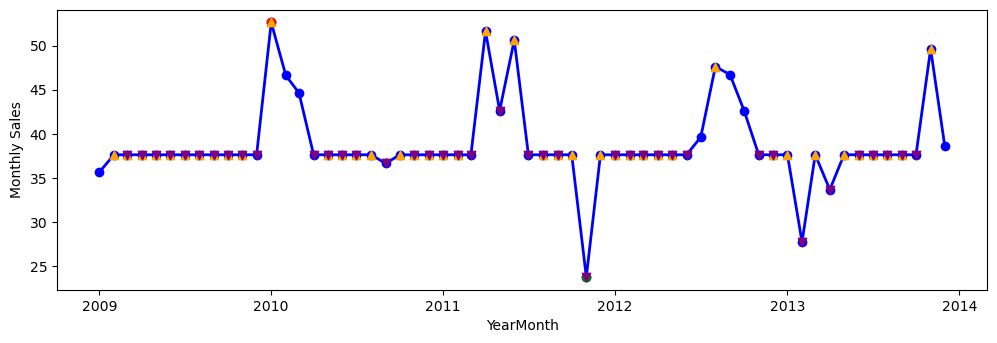

<Figure size 1000x600 with 0 Axes>

In [36]:
# Step 1: Identify Peaks (Significant Sales Events)
peak_months = monthly_sales_df[monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].max()]
dip_months = monthly_sales_df[monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].min()]

# Identifying local maxima and minima using rolling windows
local_max = monthly_sales_df[monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].rolling(window=3, center=True).max()]
local_min = monthly_sales_df[monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].rolling(window=3, center=True).min()]  
# Step 2: Plot Monthly Sales Trend (with seasonal effects and significant events)

plt.figure(figsize=(12, 8))
# Monthly Sales Trend Plot
plt.subplot(2, 1, 1)
plt.plot(monthly_sales_df['YearMonth'], monthly_sales_df['MonthlySales'], marker='o', color='b', linestyle='-', linewidth=2, label='Monthly Sales')

# Highlight significant sales events (Peaks and Dips)
plt.scatter(peak_months['YearMonth'], peak_months['MonthlySales'], color='red', label='Peak Sales', zorder=5)
plt.scatter(dip_months['YearMonth'], dip_months['MonthlySales'], color='green', label='Dip Sales', zorder=5)

# Highlight Local Maxima and Minima
plt.scatter(local_max['YearMonth'], local_max['MonthlySales'], color='orange', marker='^', label='Local Max', zorder=5)
plt.scatter(local_min['YearMonth'], local_min['MonthlySales'], color='purple', marker='v', label='Local Min', zorder=5)

# Set labels and title for the monthly plot
plt.xlabel('YearMonth')
plt.ylabel('Monthly Sales')
# Step 2: Plot the seasonal effect
plt.figure(figsize=(10, 6))


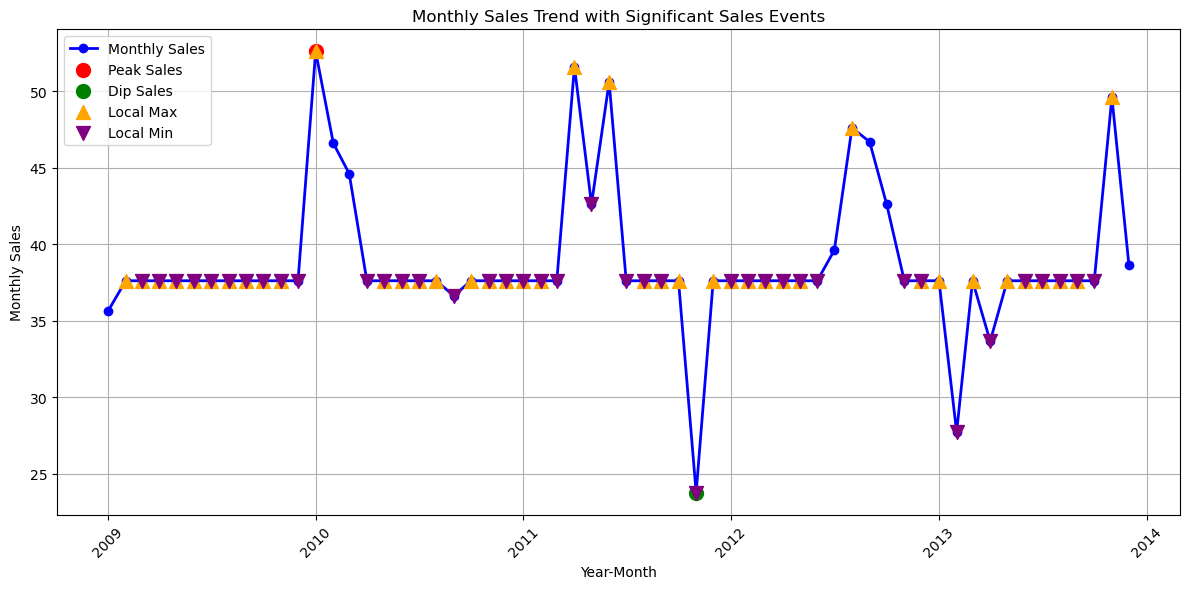

In [45]:
# Step 1: Identify Peaks (Significant Sales Events)
peak_months = monthly_sales_df[monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].max()]
dip_months = monthly_sales_df[monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].min()]

# Identifying local maxima and minima using rolling window
local_max = monthly_sales_df[monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].rolling(window=3, center=True).max()]
local_min = monthly_sales_df[monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].rolling(window=3, center=True).min()]  

# Plot 1: Monthly Sales Trend with Significant Events
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_df['YearMonth'], monthly_sales_df['MonthlySales'], marker='o', color='b', linestyle='-', linewidth=2, label='Monthly Sales')

# Highlight global peak and dip
plt.scatter(peak_months['YearMonth'], peak_months['MonthlySales'], color='red', s=100, label='Peak Sales', zorder=5)
plt.scatter(dip_months['YearMonth'], dip_months['MonthlySales'], color='green', s=100, label='Dip Sales', zorder=5)

# Highlight local max and min
plt.scatter(local_max['YearMonth'], local_max['MonthlySales'], color='orange', marker='^', s=100, label='Local Max', zorder=5)
plt.scatter(local_min['YearMonth'], local_min['MonthlySales'], color='purple', marker='v', s=100, label='Local Min', zorder=5)

# Formatting
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Trend with Significant Sales Events')
plt.grid(True)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:


# Step 1: Extract the month number from the 'YearMonth' column
monthly_sales_df['Month'] = pd.to_datetime(monthly_sales_df['YearMonth']).dt.month

# Step 2: Calculate the average sales per calendar month
monthly_avg_sales = monthly_sales_df.groupby('Month')['MonthlySales'].mean().sort_index()


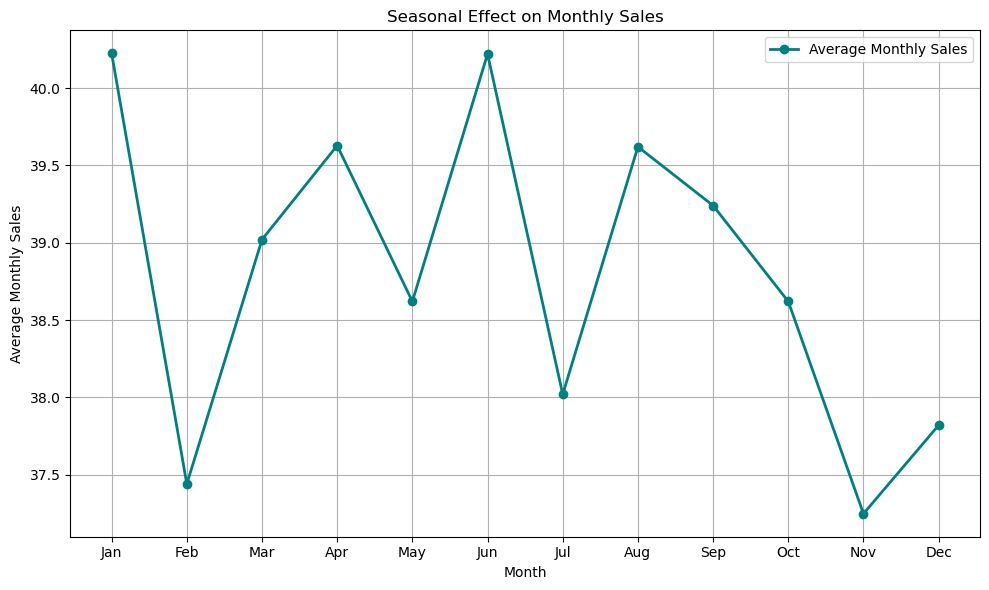

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_sales.index, monthly_avg_sales.values, marker='o', color='teal', linewidth=2, label='Average Monthly Sales')

# Formatting
plt.xlabel('Month')
plt.ylabel('Average Monthly Sales')
plt.title('Seasonal Effect on Monthly Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [61]:
monthly_sales_df['Peak'] = (monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].max()).astype(int)
monthly_sales_df['Dip'] = (monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].min()).astype(int)

monthly_sales_df['LocalMax'] = (monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].rolling(window=3, center=True).max()).astype(int)
monthly_sales_df['LocalMin'] = (monthly_sales_df['MonthlySales'] == monthly_sales_df['MonthlySales'].rolling(window=3, center=True).min()).astype(int)


In [68]:
def label_event(row):
    if row['Peak'] == 1:
        return 'Peak Sale'
    elif row['Dip'] == 1:
        return 'Dip Sale'
    elif row['LocalMax'] == 1:
        return 'Local Max'
    elif row['LocalMin'] == 1:
        return 'Local Min'
    else:
        return 'Normal'

monthly_sales_df['EventLabel'] = monthly_sales_df.apply(label_event, axis=1)


In [69]:
monthly_sales_df[['YearMonth', 'MonthlySales', 'Peak', 'Dip', 'LocalMax', 'LocalMin']].head()


,YearMonth,MonthlySales,Peak,Dip,LocalMax,LocalMin
0,2009-01-01,35.64,0,0,0,0
1,2009-02-01,37.62,0,0,1,0
2,2009-03-01,37.62,0,0,1,1
3,2009-04-01,37.62,0,0,1,1
4,2009-05-01,37.62,0,0,1,1


In [74]:
# Save seasonal effect data (average sales by month)
monthly_avg_sales_df = monthly_avg_sales.reset_index()
monthly_avg_sales_df.columns = ['YearMonth', 'AverageMonthlySales']
monthly_avg_sales_df.to_csv('monthly_avg_sales.csv', index=False)

# Save significant effect data (with flags)
monthly_sales_df.to_csv('monthly_sales_with_flagss.csv', index=False)


In [ ]:
The plot shows Seasonal Effect: If sales consistently peak in certain months (e.g., higher in December or June), it indicates that certain times of the year experience higher demand.

Low Sales Periods: Conversely, months with lower sales indicate periods of lower demand.

Anomalies: Any irregular spikes or drops in specific months could indicate events that influenced sales, such as promotions, holidays, or external factors.

In [77]:
 yearlySales_df.to_csv('yearlySaless.csv', index=False)
monthly_sales_df.to_csv('Monthly_saless.csv', index=False)
monthly_avg_sales_df.to_csv('seasonal_saless_effects.csv', index=False)
monthly_sales_df.to_csv('monthly_sales_with_events.csv', index=False)



<h2><b>Case 5: Customer Lifetime Value (CLV): Calculate the lifetime value of customers based on their purchase history</b></h2>


Customer Lifetime Value (CLV) is a key metric that helps businesses estimate the total revenue a customer is expected to generate throughout their relationship with the company. By analyzing historical purchase data, we can identify high-value customers, understand their behavior, and tailor marketing efforts to increase retention and long-term profitability.


In [106]:
%%sql
-- Selecting customer details and calculating average order value
SELECT
    c.CustomerId,  -- Unique ID for each customer
    c.FirstName || ' ' || c.LastName AS CustomerName,  -- Full name of the customer
    AVG(i.Total) AS AverageOrderValue  -- Calculating the average total spent per invoice by the customer
FROM
    customers c
JOIN
    invoices i ON c.CustomerId = i.CustomerId  -- Joining customers with their invoices
GROUP BY
    c.CustomerId, c.FirstName, c.LastName  -- Grouping by customer to get individual stats
ORDER BY
    AverageOrderValue DESC;  -- Sorting to show highest-value customers at the top


 * sqlite:///chinook.db
Done.


CustomerId,CustomerName,AverageOrderValue
6,Helena Holý,7.088571428571428
26,Richard Cunningham,6.8028571428571425
57,Luis Rojas,6.659999999999999
45,Ladislav Kovács,6.517142857142857
46,Hugh O'Reilly,6.517142857142857
24,Frank Ralston,6.231428571428571
28,Julia Barnett,6.231428571428571
37,Fynn Zimmermann,6.231428571428571
59,Puja Srivastava,6.1066666666666665
7,Astrid Gruber,6.088571428571428


In [24]:
Average_purchase_order = _

In [25]:
Average_purchase_order_df = Average_purchase_order.DataFrame()

In [26]:
Average_purchase_order_df.to_csv('Average_purchase_order.csv', index=False)

In [74]:
%%sql
-- Selecting customer information and calculating their total number of purchases
SELECT
    c.CustomerId,  -- Unique identifier for each customer
    c.FirstName || ' ' || c.LastName AS CustomerName,  -- Concatenating first and last name to form full name
    COUNT(i.InvoiceId) AS PurchaseCount  -- Counting the number of invoices per customer (i.e., total purchases made)
FROM
    customers c
JOIN
    invoices i ON c.CustomerId = i.CustomerId  -- Joining customers and invoices tables using CustomerId
GROUP BY
    c.CustomerId, c.FirstName, c.LastName  -- Grouping to ensure unique results per customer



 * sqlite:///chinook.db
Done.


CustomerId,CustomerName,PurchaseCount
1,Luís Gonçalves,7
2,Leonie Köhler,7
3,François Tremblay,7
4,Bjørn Hansen,7
5,František Wichterlová,7
6,Helena Holý,7
7,Astrid Gruber,7
8,Daan Peeters,7
9,Kara Nielsen,7
10,Eduardo Martins,7


In [108]:
Purchase_Frequency = _

In [109]:
Purchase_Frequency_df = Purchase_Frequency.DataFrame()


In [110]:
#Purchase_Frequency_df.to_csv('Purchase_Frequency.csv', index=False) 

In [111]:
%%sql
-- Calculating CLV and customer metrics from the Chinook database
SELECT
    c.CustomerId,  -- Unique identifier for each customer
    c.FirstName || ' ' || c.LastName AS CustomerName,  -- Combine first and last name to create full customer name

    ROUND(AVG(i.Total), 2) AS AverageOrderValue,  -- Average amount spent per order (rounded to 2 decimal places)

    COUNT(i.InvoiceId) AS PurchaseFrequency,  -- Number of purchases made by the customer

    ROUND((julianday(MAX(i.InvoiceDate)) - julianday(MIN(i.InvoiceDate))) / 30.0, 1) AS LifespanMonths,  
    -- Duration between first and last purchase in months, showing how long the customer has been active

    ROUND(AVG(i.Total) * COUNT(i.InvoiceId) * ((julianday(MAX(i.InvoiceDate)) - julianday(MIN(i.InvoiceDate))) / 30.0), 2) AS CLV
    -- Customer Lifetime Value = Average Order Value * Purchase Frequency * Lifespan
    -- This gives an estimate of how much revenue the customer is likely to generate over their active lifecycle

FROM
    customers c
JOIN
    invoices i ON c.CustomerId = i.CustomerId  -- Joining customer and invoice data using CustomerId

GROUP BY
    c.CustomerId, c.FirstName, c.LastName  -- Grouping by customer to get accurate aggregated values

ORDER BY
    CLV DESC;  -- Sorting results to display the highest value customers at the top



 * sqlite:///chinook.db
Done.


CustomerId,CustomerName,AverageOrderValue,PurchaseFrequency,LifespanMonths,CLV
46,Hugh O'Reilly,6.52,7,57.8,2638.36
6,Helena Holý,7.09,7,52.9,2623.24
25,Victor Stevens,6.09,7,57.8,2464.86
37,Fynn Zimmermann,6.23,7,53.2,2320.58
4,Bjørn Hansen,5.66,7,57.8,2291.36
42,Wyatt Girard,5.66,7,57.8,2291.36
23,John Gordon,5.37,7,59.6,2242.15
44,Terhi Hämäläinen,5.95,7,52.9,2200.31
8,Daan Peeters,5.37,7,57.8,2175.69
21,Kathy Chase,5.37,7,57.8,2175.69


In [112]:
Customer_Lifetime_Value = _

In [114]:
Customer_LifetimeValue_df=Customer_Lifetime_Value.DataFrame()

In [33]:
Customer_LifetimeValue_df.to_csv('Customer_CLV.csv', index=False)


In [115]:
print(Customer_LifetimeValue_df.columns)


Index(['CustomerId', 'CustomerName', 'AverageOrderValue', 'PurchaseFrequency',
       'LifespanMonths', 'CLV'],
      dtype='object')


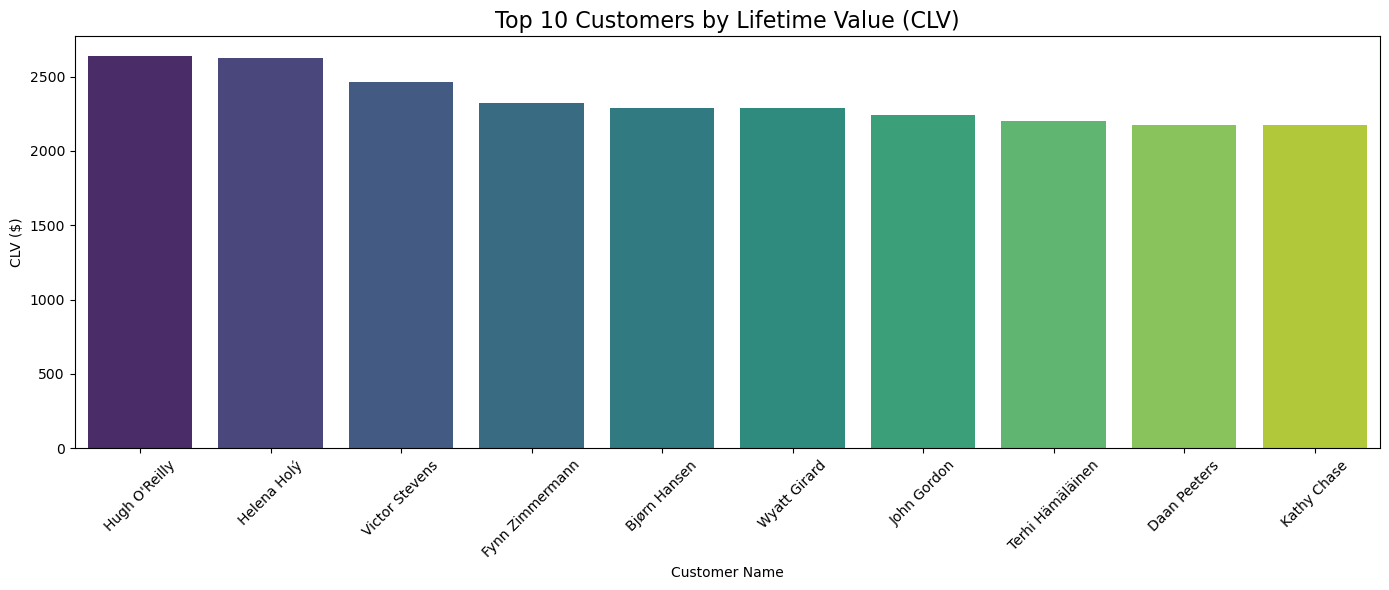

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by CLV
top_10 = Customer_LifetimeValue_df.sort_values(by='CLV', ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x='CustomerName', y='CLV', hue='CustomerName', data=top_10, palette='viridis', legend=False)

plt.title('Top 10 Customers by Lifetime Value (CLV)', fontsize=16)
plt.xlabel('Customer Name')
plt.ylabel('CLV ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [116]:
top_10 =  _
top_10_df =top_10.DataFrame()

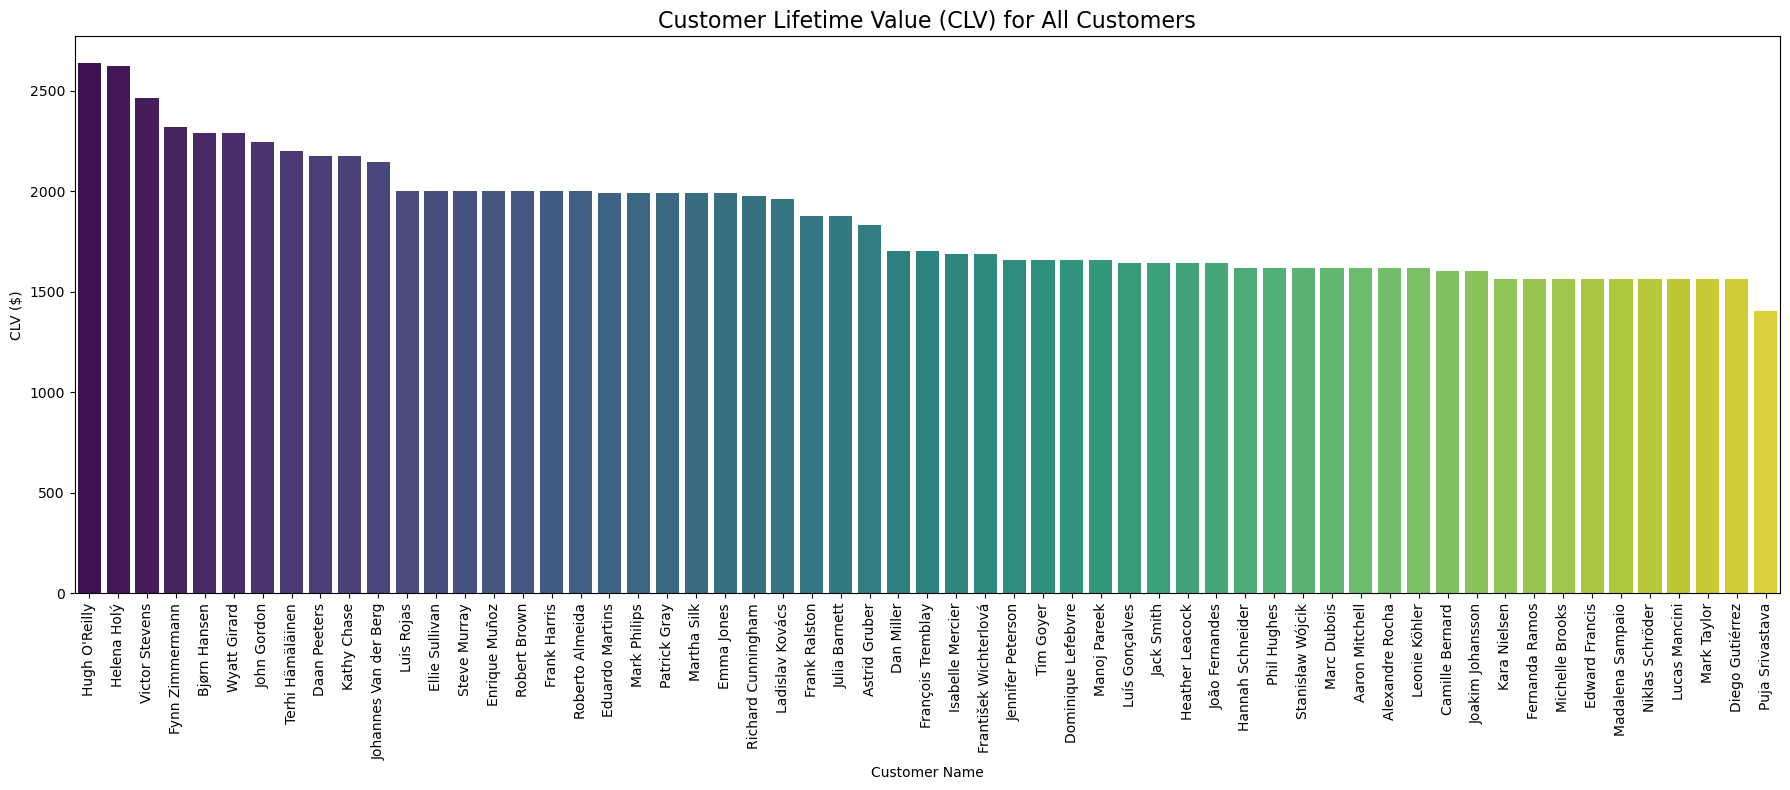

In [117]:
# Sort all customers by CLV
all_customers = Customer_LifetimeValue_df.sort_values(by='CLV', ascending=False)

# Plot
plt.figure(figsize=(18, 8))  # Wider figure for many names
sns.barplot(x='CustomerName', y='CLV', hue='CustomerName', data=all_customers, palette='viridis', legend=False)

plt.title('Customer Lifetime Value (CLV) for All Customers', fontsize=16)
plt.xlabel('Customer Name')
plt.ylabel('CLV ($)')
plt.xticks(rotation=90)  # Rotate more for longer lists
plt.tight_layout()
plt.show()


In [118]:
all_customers = _
all_customers_df = all_customers.DataFrame()

In [45]:
# Save top 10 CLV customers
top_10_df.to_csv('top_10_clv_customers.csv', index=False)

# Save all customers with CLV
all_customers_df.to_csv('all_customers_clv.csv', index=False)


In [119]:
# Summary statistics
print(Customer_LifetimeValue_df['CLV'].describe())

# Value counts to see clustering
print("\nTop 20 most common CLV values:")
print(Customer_LifetimeValue_df['CLV'].value_counts().head(20))


count      59.000000
mean     1847.633051
std       291.742398
min      1405.750000
25%      1616.410000
50%      1702.340000
75%      2001.380000
max      2638.360000
Name: CLV, dtype: float64

Top 20 most common CLV values:
CLV
1561.23    9
1616.41    7
2001.38    6
1988.84    5
1644.23    4
1659.37    4
1874.21    2
1602.73    2
2291.36    2
2175.69    2
1685.73    2
1702.34    2
2638.36    1
1831.24    1
1976.23    1
1960.14    1
2623.24    1
2003.11    1
2147.44    1
2200.31    1
Name: count, dtype: int64


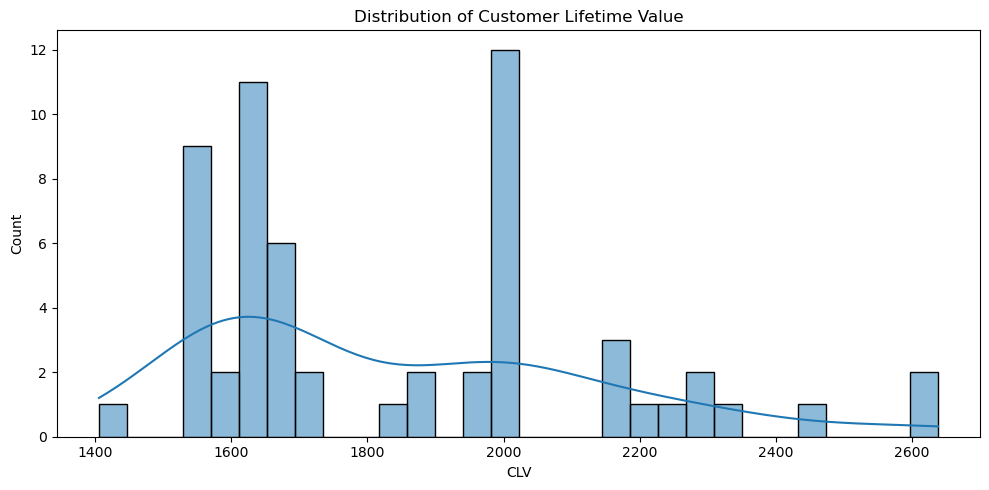

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(Customer_LifetimeValue_df['CLV'], bins=30, kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('CLV')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


The  plot above shows the distribution of Customer Lifetime Value (CLV), allowing us to manually observe and define thresholds for customer segmentation into High, Medium, and Low CLV groups.By analyzing the shape and spread of the histogram, we can visually determine natural breakpoints or clusters,segment customers based on their lifetime revenue contribution,tailor marketing strategies to high-value customers, while identifying opportunities to grow lower-value segments. This plot serves as a foundation for customer segmentation and strategic targeting.


In [122]:
import pandas as pd

# Assuming you already have your DataFrame
# Customer_LifetimeValue_df = pd.read_csv('your_file.csv')  # Uncomment if you're reading from CSV

# Define CLV group thresholds
def clv_group(clv):
    if clv >= 2100:
        return 'High'
    elif clv >= 1700:
        return 'Medium'
    else:
        return 'Low'

# Apply the grouping function
Customer_LifetimeValue_df['CLV_Group'] = Customer_LifetimeValue_df['CLV'].apply(clv_group)

# Preview the result
print(Customer_LifetimeValue_df[['CustomerName', 'CLV', 'CLV_Group']].head(20))

# Export the new DataFrame to CSV for Power BI
Customer_LifetimeValue_df.to_csv('customers_with_clv_group.csv', index=False)



             CustomerName      CLV CLV_Group
0           Hugh O'Reilly  2638.36      High
1             Helena Holý  2623.24      High
2          Victor Stevens  2464.86      High
3         Fynn Zimmermann  2320.58      High
4            Bjørn Hansen  2291.36      High
5            Wyatt Girard  2291.36      High
6             John Gordon  2242.15      High
7        Terhi Hämäläinen  2200.31      High
8            Daan Peeters  2175.69      High
9             Kathy Chase  2175.69      High
10  Johannes Van der Berg  2147.44      High
11             Luis Rojas  2003.11    Medium
12        Roberto Almeida  2001.38    Medium
13           Frank Harris  2001.38    Medium
14           Robert Brown  2001.38    Medium
15         Ellie Sullivan  2001.38    Medium
16          Enrique Muñoz  2001.38    Medium
17           Steve Murray  2001.38    Medium
18        Eduardo Martins  1988.84    Medium
19           Mark Philips  1988.84    Medium


'##**Recommendations to Improve Customer Retention**

Based on the CLV analysis:

1. Identify Top Customers and focus marketing efforts on high CLV customers and also offer exclusive discounts or early access to new products.

2. Introduce loyalty programs or subscriptions.
3. Reactivate Dormant Customers using email campaigns to target customers with long gaps between purchases.
4. Segment customers based on life span and Introduce engagement Campaigns like Birthday or anniversary emails with coupons.

<h2><b>Case 6: Market Basket Analysis: Perform association rule mining to find common combinations of 
tracks or albums purchase  together* </b></h2>.


In this case, we apply MBA to the <b>Chinook database</b> to identify which <b>albums or tracks are frequently purchased together. In this case we will identify albums purchased together.</b>.</p>

<p>
We use the <b>Apriori algorithm</b> to find frequent itemsets and generate <b>association rules</b> based on metrics such as:
<ul>
    <li><b>Support</b> – How frequently an itemset appears in the dataset</li>
    <li><b>Confidence</b> – The likelihood of buying item B given that item A was purchased</li>
    <li><b>Lift</b> – The strength of a rule over random co-occurrence</li>
</ul>
</p>

<p>
This analysis helps in:
<ul>
    <li>Designing cross-selling and up-selling strategies</li>
    <li>Creating combo deals or recommendations for albums/tracks</li>
    <li>Understanding customer preferences and product affinities</li>
</ul>
</p>

<p>
The insights are visualized with scatterplots and interactive filters to make exploration of purchase patterns easy and insightful.
</p>


In [80]:
# Step 1: Import all necessary libraries
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [81]:
%%sql
basket <<
SELECT 
    i.InvoiceId,
    a.Title AS AlbumTitle
FROM 
    invoices i
    JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
    JOIN tracks t ON ii.TrackId = t.TrackId
    JOIN albums a ON t.AlbumId = a.AlbumId
GROUP BY 
    i.InvoiceId, a.AlbumId
ORDER BY 
    i.InvoiceId, a.Title;


 * sqlite:///chinook.db
Done.
Returning data to local variable basket


In [87]:
# Step 2: Convert result to DataFrame
basket_df = basket.DataFrame()


In [126]:
basket_df.head()

,InvoiceId,AlbumTitle
0,1,Balls to the Wall
1,1,Restless and Wild
2,2,For Those About To Rock We Salute You
3,3,Big Ones
4,3,Let There Be Rock


In [83]:
%%sql
WITH pairings AS (
    SELECT 
        ii1.TrackId AS firstTrack,
        ii2.TrackId AS secondTrack,
        COUNT(*) AS Pairs
    FROM 
        invoice_items ii1
    JOIN 
        invoice_items ii2 ON ii1.InvoiceId = ii2.InvoiceId
    WHERE 
        ii1.TrackId < ii2.TrackId
    GROUP BY 
        ii1.TrackId, ii2.TrackId
)
SELECT
    tr1.Name AS TrackName1,
    tr2.Name AS TrackName2,
    pr.Pairs AS Count
FROM 
    pairings pr
JOIN 
    tracks tr1 ON pr.firstTrack = tr1.TrackId
JOIN 
    tracks tr2 ON pr.secondTrack = tr2.TrackId
ORDER BY 
    Count DESC;



 * sqlite:///chinook.db
Done.


TrackName1,TrackName2,Count
Snowballed,"String Quartet No. 12 in C Minor, D. 703 ""Quartettsatz"": II. Andante - Allegro assai",2
Overdose,Deuces Are Wild,2
Not The Doctor,Por Causa De Você,2
Not The Doctor,Welcome Home (Sanitarium),2
Por Causa De Você,Welcome Home (Sanitarium),2
Samba De Orly,Geni E O Zepelim,2
Samba Do Lado,Amor De Muito,2
Lixo Do Mangue,A Cor Do Sol,2
Lixo Do Mangue,Linha Do Equador,2
A Cor Do Sol,Linha Do Equador,2


In [88]:

# Group albums per invoice into a single list
albums_together = basket_df.groupby('InvoiceId')['AlbumTitle'].apply(list).reset_index()

# Filter only those invoices that have more than one album
albums_together = albums_together[albums_together['AlbumTitle'].apply(len) > 1]

# Display result
albums_together.head(10)


,InvoiceId,AlbumTitle
0,1,"[Balls to the Wall, Restless and Wild]"
2,3,"[Big Ones, Let There Be Rock]"
3,4,"[Audioslave, Facelift, Jagged Little Pill, Pla..."
4,5,"[Alcohol Fueled Brewtality Live! [Disc 1], Alc..."
10,11,"[Acústico MTV [Live], Cidade Negra - Hits, Da ..."
11,12,"[Axé Bahia 2001, BBC Sessions [Disc 1] [Live],..."
14,15,"[Heart of the Night, International Superhits]"
16,17,"[International Superhits, Into The Light]"
17,18,"[MK III The Final Concerts [Disc 1], Meus Mome..."
18,19,"[Chronicle, Vol. 1, Sambas De Enredo 2001, Sup..."


In [89]:
# Step 3: Create a transaction matrix (InvoiceId vs AlbumTitle, 1 if bought, 0 if not)
import pandas as pd
basket_albums = pd.crosstab(basket_df['InvoiceId'], basket_df['AlbumTitle']).astype(bool)


In [90]:
frequent_itemsets = apriori(basket_albums, min_support=0.008, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules['item_count'] = rules['antecedents'].apply(len) + rules['consequents'].apply(len)


In [91]:
# Step 6: Keep only pairs (2-item rules)
pair_rules = rules[rules['item_count'] == 2].copy()


In [92]:
# Step 7: Sort by lift and pick top 10
top_rules = pair_rules.sort_values(by='lift', ascending=False).head(10).copy()


In [93]:
# Step 8: Convert frozensets to strings for easier display
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x))
pair_rules['antecedents'] = pair_rules['antecedents'].apply(lambda x: ', '.join(x))
pair_rules['consequents'] = pair_rules['consequents'].apply(lambda x: ', '.join(x))
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(x))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(x))


In [94]:
# Step 9: Print the Top 10 association rules
print("🎵 Top 10 Album Association Rules by Lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(3).to_string(index=False))


🎵 Top 10 Album Association Rules by Lift:
                       antecedents                        consequents  support  confidence  lift
                   A Real Live One                    A Real Dead One     0.01         1.0 103.0
                Slaves And Masters                The Battle Rages On     0.01         1.0 103.0
                      Supernatural The Essential Miles Davis [Disc 1]     0.01         1.0 103.0
                      Supernatural               The Best of Ed Motta     0.01         1.0 103.0
              The Best of Ed Motta                       Supernatural     0.01         1.0 103.0
                      Stormbringer Vault: Def Leppard's Greatest Hits     0.01         1.0 103.0
Vault: Def Leppard's Greatest Hits                       Stormbringer     0.01         1.0 103.0
               The Battle Rages On                       Stormbringer     0.01         1.0 103.0
                      Stormbringer                The Battle Rages On     0.01       

In [141]:
# Export to CSV for Power BI
top_rules.to_csv("Top_10_Album_Association_Ruless.csv", index=False)
frequent_itemsets.to_csv("Frequent_Album_Itemsetss.csv", index=False)

print("✅ Exported to CSV. You can now import the files into Power BI.")


✅ Exported to CSV. You can now import the files into Power BI.


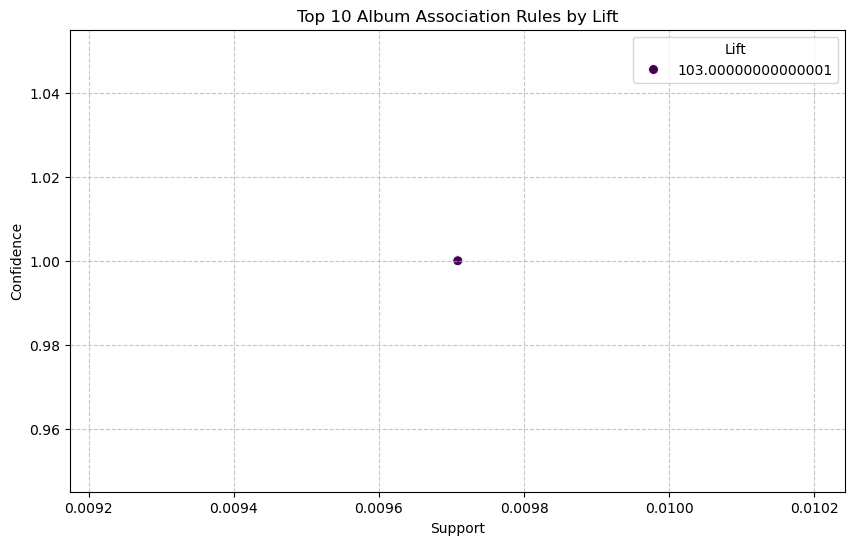

In [95]:
# Step 10: Visualize the Top 10 rules
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(50, 500))
plt.title("Top 10 Album Association Rules by Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title="Lift", loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Spreading out since overlapping points stack**

In [96]:
# Import warning to avoid deprecated function warning

import numpy as np
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

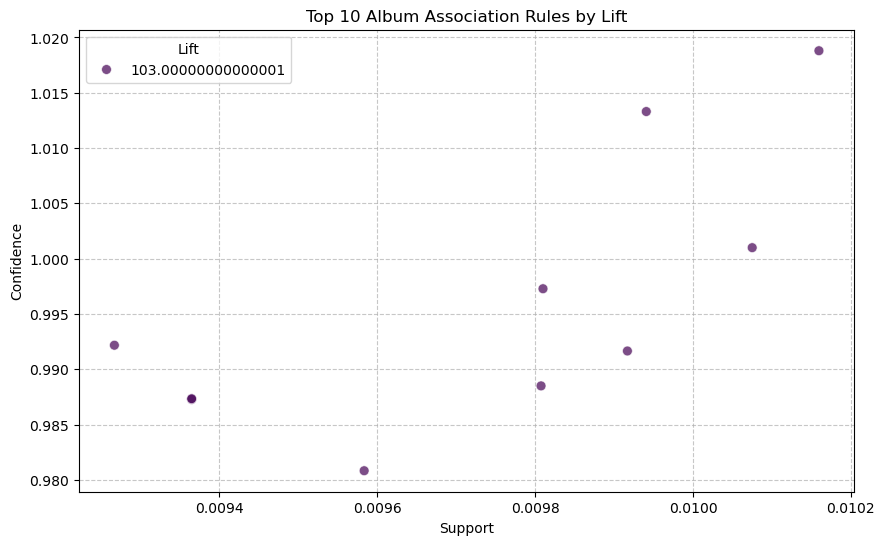

In [97]:
# Add manual jitter to spread out the points
np.random.seed(42)  # For reproducibility
jitter_support = np.random.uniform(-0.0005, 0.0005, size=len(top_rules))  # Small wiggle for support
jitter_confidence = np.random.uniform(-0.02, 0.02, size=len(top_rules))  # Small wiggle for confidence
top_rules['support_jittered'] = top_rules['support'] + jitter_support
top_rules['confidence_jittered'] = top_rules['confidence'] + jitter_confidence

# Visualization with jittered values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_rules, x='support_jittered', y='confidence_jittered', size='lift', hue='lift', 
                palette='viridis', sizes=(50, 500), alpha=0.7)
plt.title("Top 10 Album Association Rules by Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title="Lift", loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [98]:

top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_csv('top_10_rules_by_lift.csv', index=False)